In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
heart = pd.read_csv('../data/heart2.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_bin,hereditary
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,20-40,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,40-60,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,20-40,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,40-60,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,40-60,0


In [3]:
heart[heart['Cholesterol'] == 0]['HeartDisease'].value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

In [4]:
heart.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

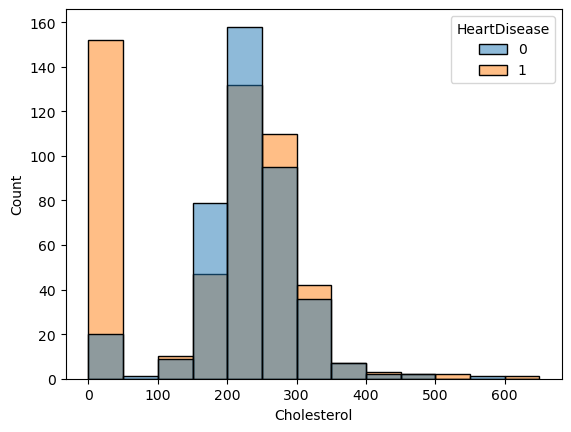

In [5]:
sns.histplot(x='Cholesterol', hue='HeartDisease', data=heart, binwidth=50)
plt.show()

### Create features and dummies, and then split and scale the data

In [6]:
feat = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'hereditary']
X = heart[feat]
y = heart.HeartDisease

In [7]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3)

In [8]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s = setup(heart, target = 'HeartDisease')
#choose classification, predictor variable, will show 

,Description,Value
0,Session id,6182
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 14)"
4,Transformed data shape,"(918, 23)"
5,Transformed train set shape,"(642, 23)"
6,Transformed test set shape,"(276, 23)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,6


In [13]:
best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8801,0.9360,0.9155,0.8774,0.8948,0.7555,0.7594,0.3820
lightgbm,Light Gradient Boosting Machine,0.8645,0.9267,0.8874,0.8734,0.8794,0.7247,0.7268,0.1240
rf,Random Forest Classifier,0.8613,0.9262,0.8871,0.8687,0.8763,0.7182,0.7216,0.0960
ridge,Ridge Classifier,0.8584,0.0000,0.8926,0.8615,0.8752,0.7114,0.7155,0.0290
lda,Linear Discriminant Analysis,0.8584,0.9222,0.8926,0.8615,0.8752,0.7114,0.7155,0.0410
gbc,Gradient Boosting Classifier,0.8567,0.9315,0.8733,0.8714,0.8712,0.7096,0.7119,0.0700
lr,Logistic Regression,0.8536,0.9237,0.8898,0.8565,0.8713,0.7017,0.7058,0.4230
et,Extra Trees Classifier,0.8490,0.9133,0.8788,0.8563,0.8662,0.6928,0.6958,0.0870
ada,Ada Boost Classifier,0.8427,0.9088,0.8733,0.8513,0.8604,0.6803,0.6842,0.0510
nb,Naive Bayes,0.8115,0.9128,0.7238,0.9224,0.8097,0.6278,0.6477,0.0370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [22]:
best

In [23]:
tuned = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8769,0.9483,0.9444,0.8500,0.8947,0.7476,0.7536
1,0.8769,0.9330,0.9722,0.8333,0.8974,0.7458,0.7598
2,0.8438,0.8640,0.9429,0.8049,0.8684,0.6790,0.6920
3,0.8594,0.9419,0.8571,0.8824,0.8696,0.7171,0.7174
4,0.8594,0.9537,0.8857,0.8611,0.8732,0.7154,0.7158
5,0.8906,0.9645,0.8857,0.9118,0.8986,0.7800,0.7803
6,0.9062,0.9458,0.8857,0.9394,0.9118,0.8119,0.8135
7,0.8438,0.9375,0.8611,0.8611,0.8611,0.6825,0.6825
8,0.9219,0.9563,0.9444,0.9189,0.9315,0.8406,0.8411


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

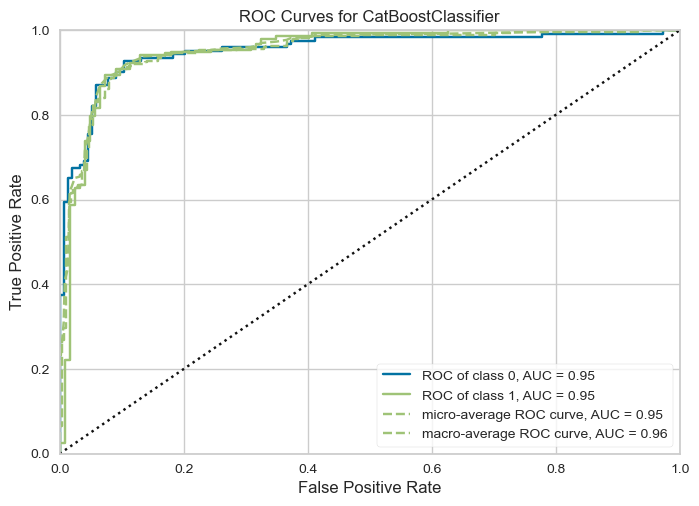

In [20]:
s.plot_model(best, plot = 'auc')

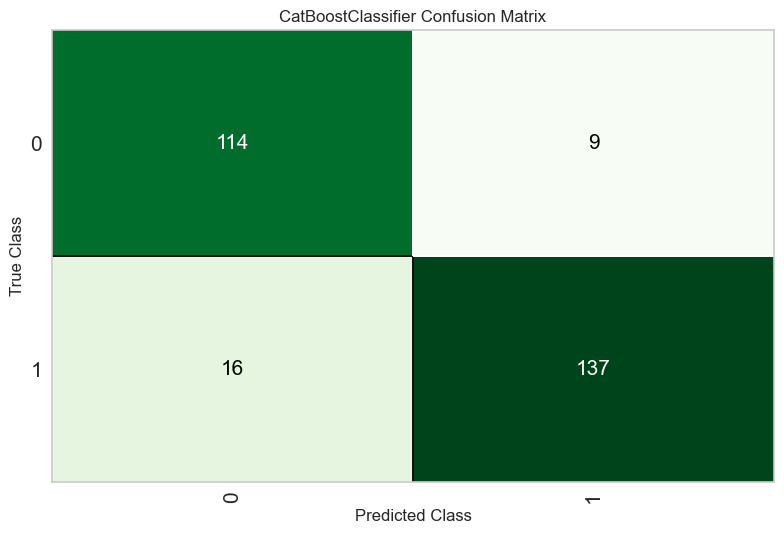

In [21]:
s.plot_model(best, plot = 'confusion_matrix')